In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [29]:
a = train[['CO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']]

In [15]:
a.head()

,NU_INSCRICAO,NU_NOTA_CH,NU_NOTA_REDACAO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,495.4,520.0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,544.1,580.0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN


In [11]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


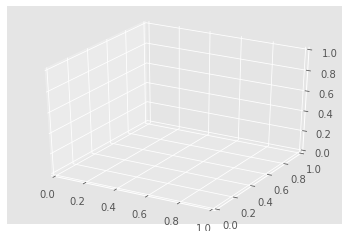

In [20]:
fig = plt.figure()
grafico = fig.gca(projection='3d')

In [30]:
x = a['CO_MUNICIPIO_RESIDENCIA']
y = a['NU_NOTA_CH']
z = a['NU_NOTA_REDACAO']

In [34]:
z = np.linspace(-3,3,100)
y = np.linspace(-10,10,100)
x = z *np.sin(y)

In [35]:
grafico.plot(x,y,z, color='red');

In [36]:
plt.show()

In [7]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:10], '\n')

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
Name: NU_NOTA_MT, dtype: float64 



In [4]:
features = ['TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
features_corr = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
df_train = train[features_corr]
df_test = test[features]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 6 columns):
IN_TREINEIRO       13730 non-null int64
TP_ST_CONCLUSAO    13730 non-null int64
TP_PRESENCA_CN     13730 non-null int64
TP_PRESENCA_CH     13730 non-null int64
TP_PRESENCA_LC     13730 non-null int64
TP_PRESENCA_MT     13730 non-null int64
dtypes: int64(6)
memory usage: 643.7 KB


In [6]:
df_train.isnull().sum()

IN_TREINEIRO       0
TP_ST_CONCLUSAO    0
TP_PRESENCA_CN     0
TP_PRESENCA_CH     0
TP_PRESENCA_LC     0
TP_PRESENCA_MT     0
dtype: int64

In [7]:
df_test.isnull().sum()

TP_ST_CONCLUSAO    0
TP_PRESENCA_CN     0
TP_PRESENCA_CH     0
TP_PRESENCA_LC     0
TP_PRESENCA_MT     0
dtype: int64

In [8]:
y_train = df_train['IN_TREINEIRO']
df_train.drop('IN_TREINEIRO', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)   

In [10]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [11]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [12]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [13]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 0.03812673
MSE: 0.03804982
RMSE: 0.19506363


In [14]:
y_pred_test

array([0., 0., 1., ..., 0., 0., 0.])

In [15]:
type(y_pred_test)

numpy.ndarray

In [16]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO
submission['IN_TREINEIRO'] = y_pred_test.astype(int)

In [17]:
submission.sample(20)

,NU_INSCRICAO,IN_TREINEIRO
374,73de61ef5ce55a99c860b90cb6ae40cf5204c74a,0
1575,5580681512f1b8ba033fe61b6bdd4741872cade5,0
3081,653828d5ec6455de87fb37922c90d7a38e7a1793,0
3680,3b4b5258e3d42b2c871fceb4b8d1402463d95a7b,0
992,33e3233640c58dd50233b1f6169af36a2cfb7c96,0
3352,64afa113b956ee1085921c7f57fa8d68f9f7367b,0
403,c296cb821061a1c7c717f1f79adaff624c62493f,0
1732,47dc816b33071b369e044dae469016d2d3d04167,0
4512,6ae44e532f63d0009e8011c564bd113a1e15ae0f,0
3894,a3754ee140aaeff6a7f29f27ead573b6e33fb414,0


In [18]:
submission.to_csv('answer.csv', index=False, header=True)